In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/hadley/r4ds/master/data/heights.csv')
df

,earn,height,sex,ed,age,race
0,50000.0,74.424439,male,16,45,white
1,60000.0,65.537543,female,16,58,white
2,30000.0,63.629198,female,16,29,white
3,50000.0,63.108562,female,16,91,other
4,51000.0,63.402484,female,17,39,white
...,...,...,...,...,...,...
1187,19000.0,72.165733,male,12,29,white
1188,15000.0,61.135800,female,18,82,white
1189,8000.0,63.664164,female,12,33,white
1190,60000.0,71.925836,male,12,50,white


In [2]:
max_thresold = df['height'].quantile(0.99)
max_thresold

75.15891392426795

In [3]:
min_thresold = df['height'].quantile(0.15)
min_thresold

62.874164566711954

In [4]:
df[df['height']<min_thresold]

,earn,height,sex,ed,age,race
6,29000.0,61.656326,female,12,49,white
20,5000.0,62.375527,female,13,51,white
34,7500.0,61.178223,female,14,78,white
43,11000.0,60.450660,female,12,21,hispanic
45,20000.0,61.814919,female,12,29,white
...,...,...,...,...,...,...
1173,31000.0,61.965598,female,14,39,white
1178,20000.0,62.137132,female,17,30,white
1179,15000.0,59.776290,female,12,76,black
1181,2000.0,60.197099,female,6,67,hispanic


In [5]:
df.describe()

,earn,height,ed,age
count,1192.000000,1192.000000,1192.000000,1192.000000
mean,23154.773490,66.915154,13.504195,41.378356
std,19472.296925,3.853968,2.420175,15.867428
min,200.000000,57.503219,3.000000,18.000000
25%,10000.000000,64.009746,12.000000,29.000000
50%,20000.000000,66.451265,13.000000,38.000000
75%,30000.000000,69.848100,16.000000,51.000000
max,200000.000000,77.051282,18.000000,91.000000


In [6]:
df[['sex','height']]

,sex,height
0,male,74.424439
1,female,65.537543
2,female,63.629198
3,female,63.108562
4,female,63.402484
...,...,...
1187,male,72.165733
1188,female,61.135800
1189,female,63.664164
1190,male,71.925836


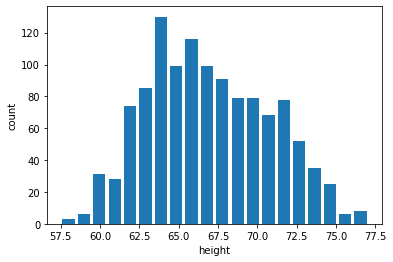

In [7]:
import matplotlib.pyplot as plt
plt.hist(df['height'],bins=20,rwidth=0.8)
plt.xlabel('height')
plt.ylabel('count')
plt.show()

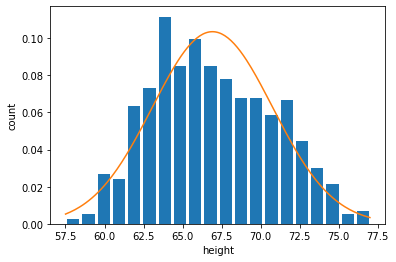

In [8]:
from scipy.stats import norm
import numpy as np

plt.hist(df['height'],bins=20,rwidth=0.8,density=True)
plt.xlabel('height')
plt.ylabel('count')

rng = np.arange(df['height'].min(), df['height'].max(),0.1)
plt.plot(rng,norm.pdf(rng,df['height'].mean(), df['height'].std()))


In [9]:
df['height'].mean()

66.91515376107574

In [10]:
df['height'].std()

3.853967839832441

In [11]:
upper_limit = df['height'].mean() + 3*df['height'].std()
upper_limit

78.47705728057306

In [12]:
lower_limit = df['height'].mean() - 3*df['height'].std()
lower_limit

55.35325024157842

In [13]:
# to find outliers
df[(df['height']>upper_limit) | (df['height']<lower_limit)]

,earn,height,sex,ed,age,race


**now alternate way to remove outliers is zscore**

In [14]:
df['zscore'] =  (df['height'] - df['height'].mean())/df['height'].std()

In [15]:
df

,earn,height,sex,ed,age,race,zscore
0,50000.0,74.424439,male,16,45,white,1.948456
1,60000.0,65.537543,female,16,58,white,-0.357453
2,30000.0,63.629198,female,16,29,white,-0.852616
3,50000.0,63.108562,female,16,91,other,-0.987707
4,51000.0,63.402484,female,17,39,white,-0.911443
...,...,...,...,...,...,...,...
1187,19000.0,72.165733,male,12,29,white,1.362383
1188,15000.0,61.135800,female,18,82,white,-1.499585
1189,8000.0,63.664164,female,12,33,white,-0.843544
1190,60000.0,71.925836,male,12,50,white,1.300136


In [16]:
df[df['zscore']>3]

,earn,height,sex,ed,age,race,zscore


In [17]:
df[df['zscore']<-3]

,earn,height,sex,ed,age,race,zscore


In [18]:
df.describe()

,earn,height,ed,age,zscore
count,1192.000000,1192.000000,1192.000000,1192.000000,1.192000e+03
mean,23154.773490,66.915154,13.504195,41.378356,-2.684747e-16
std,19472.296925,3.853968,2.420175,15.867428,1.000000e+00
min,200.000000,57.503219,3.000000,18.000000,-2.442142e+00
25%,10000.000000,64.009746,12.000000,29.000000,-7.538745e-01
50%,20000.000000,66.451265,13.000000,38.000000,-1.203665e-01
75%,30000.000000,69.848100,16.000000,51.000000,7.610199e-01
max,200000.000000,77.051282,18.000000,91.000000,2.630050e+00
